## Who doesn't love food? : Consuming APIs and utilizing Sentiment Analysis

@author [gggordon](github.com/gggordon)

@created 31.10.2018

The following notebook is an introduction tutorial presented as part of a wider course Data Warehousing and Data Mining. While the notebook does provide sample constructs and resources. The author only intends to presents the concepts and does not  indicate ownership of the resources presented. 

NB. This notebook is accompanied by a discussion

### Topics:
    - Restful APIs
    - Wordclouds
    - Correlation
    - Sentiment Analysis

### Aim: To retrieve comments from a food related API (restful) and perform sentiment analysis on the data set

In [1]:
# import the necessary libraries

import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting 
import seaborn as sns # visualizations

## The Food API

We well be consuming/retrieving data from a [restful](https://en.wikipedia.org/wiki/Representational_state_transfer) [api](https://en.wikipedia.org/wiki/Application_programming_interface) provided by [VegGuide.org](https://www.vegguide.org). 

You may learn more about the API and how to access it here :  https://www.vegguide.org/site/api-docs

You may test and explore the api here : https://www.vegguide.org/api-explorer/

In [2]:
# storing or settings to access the API in variables
api_base_url = 'https://www.vegguide.org' 
region_id = 2 # we can retrieve reviews from different regions
resource_path='/entry/{0}/reviews'.format(region_id) 
api_comments_url = api_base_url+resource_path #actual url that will be used

In [3]:
import requests # importing the requests library to perform http requests the api

In [4]:
# perform a http GET request to the URL specified earlier with custom HTTP headers
req = requests.get(api_comments_url, headers={
    'User-Agent':'SampleApi/0.01',
    'Accept':'application/json'})

In [5]:
#extract the data from the http response
data = req.json()

In [6]:
data # just viewing the data

[{'body': {'text/html': '<p>I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   </p>\n',
   'text/vnd.vegguide.org-wikitext': 'I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   '},
  'last_modified_datetime': '2010-09-07T19:28:18Z',
  'rating': 2,
  'user': {'name': 'Emme',
   'uri': 'https://www.vegguide.org/user/1101',
   'veg_level': 4,
   'veg_level_description': 'vegan'}},
 {'body': {'text/html': "<p>This Ku

In [7]:
# How many rows/records
print('We have {0} rows/records in the retrieved dataset'.format(len(data))) 

We have 28 rows/records in the retrieved dataset


In [8]:
# What does one row/record look like?
data[0] 

{'body': {'text/html': '<p>I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   </p>\n',
  'text/vnd.vegguide.org-wikitext': 'I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   '},
 'last_modified_datetime': '2010-09-07T19:28:18Z',
 'rating': 2,
 'user': {'name': 'Emme',
  'uri': 'https://www.vegguide.org/user/1101',
  'veg_level': 4,
  'veg_level_description': 'vegan'}}

In [9]:
# What keys/entries/columns are available in json row?
data[0].keys()

dict_keys(['body', 'user', 'last_modified_datetime', 'rating'])

In [10]:
data[0]['body'] # a close look at the body key

{'text/html': '<p>I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   </p>\n',
 'text/vnd.vegguide.org-wikitext': 'I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   '}

In [11]:
data[0]['body']['text/vnd.vegguide.org-wikitext']

'I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   '

In [12]:
# This cell has an error, only kept for discussion purposes


#data_rows=[]
#for index in range(0,len(data)):
#    row = data[index]
#    data_rows.append({
#        'comment':row['body']['text/vnd.vegguide.org-wikitext'],
#        'date':row['last_modified_datetime'],
#        'user_veg_level_num':row['user']['veg_level'],
#        'user_veg_level_desc':row['user']['veg_level_description'],
#        'user_name':row['user']['name'],
#        'rating':row['rating']
#    })
#data_rows

In [13]:
# This cell has an error, only kept for discussion purposes


#data_rows=[]
#for index in range(0,len(data)):
#    row = data[index]
#    print(index)
#    print(row.keys())
#    data_rows.append({
#        'comment':row['body']['text/vnd.vegguide.org-wikitext'],
#        'date':row['last_modified_datetime'],
#        'user_veg_level_num':row['user']['veg_level'],
#        'user_veg_level_desc':row['user']['veg_level_description'],
#        'user_name':row['user']['name'],
#        'rating':row['rating']
#   })
#data_rows

In [14]:
#extracting the data as flat records to be added to a list `data_rows`
data_rows=[] # create a list to store all records
for index in range(0,len(data)): # iterate for each row in dataset
    row = data[index] #temporary variable to store row
    data_rows.append({ # extracting data from json document and creating dictionary and appending
        'comment':row['body']['text/vnd.vegguide.org-wikitext'] if 'body' in row else '',
        'date':row['last_modified_datetime'] if 'last_modified_datetime' in row else None,
        'user_veg_level_num':row['user']['veg_level'],
        'user_veg_level_desc':row['user']['veg_level_description'],
        'user_name':row['user']['name'],
        'rating':row['rating']
    })
data_rows #previewing results

[{'comment': 'I got the dolmas and tabouli salad which were decent, but I was not overly impressed, especially as the waiter put us at a uneven, unsteady table by the door where everyone had to inch past us, thus wobbling the table further.  When we complained, the waiter put a napkin under one of the table legs when open tables were clearly available.   ',
  'date': '2010-09-07T19:28:18Z',
  'rating': 2,
  'user_name': 'Emme',
  'user_veg_level_desc': 'vegan',
  'user_veg_level_num': 4},
 {'comment': "This Kurdish restaurant has great atmosphere and offers a large variety of vegetarian & vegan options! \nThe interior is striking with bright colors, rich tapestries, regional photographs, and sun shining in during the noon hour. It is casual, comfortable dining at small tables or cozy booths. \nI had the Biryani, a flavorful dish of rice, noodles, potatoes, vegetables, and raisins in a delicious lemony oil. It was served with a Silopi (fresh cucumber and tomato) salad. I also tasted the

In [15]:
data2 = pd.DataFrame(data_rows) # transform results as dataframe
data2.head() #preview dataframe

,comment,date,rating,user_name,user_veg_level_desc,user_veg_level_num
0,I got the dolmas and tabouli salad which were ...,2010-09-07T19:28:18Z,2,Emme,vegan,4
1,This Kurdish restaurant has great atmosphere a...,2009-08-27T23:26:55Z,4,qster,not telling,0
2,You MUST order the Niskena. It may not sound g...,2009-07-27T04:19:21Z,4,Capelli,not telling,0
3,"Babani's is a quaint, friendly place with simp...",2009-07-23T07:03:32Z,3,conde.kedar,vegan,4
4,This restaurant is great! The tiny seating ar...,2007-03-20T03:50:08Z,5,snowbunny87,not telling,0


In [18]:
#utiliy method to draw a wordcloud from list/series
#modified
def wordcloud_draw(data, color = 'black'):
    """
       Draws a wordcloud
       
       params:
           data : list/series - set of sentences to include
        
       requires ```wordcloud``` package
    """
    from wordcloud import WordCloud, STOPWORDS
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

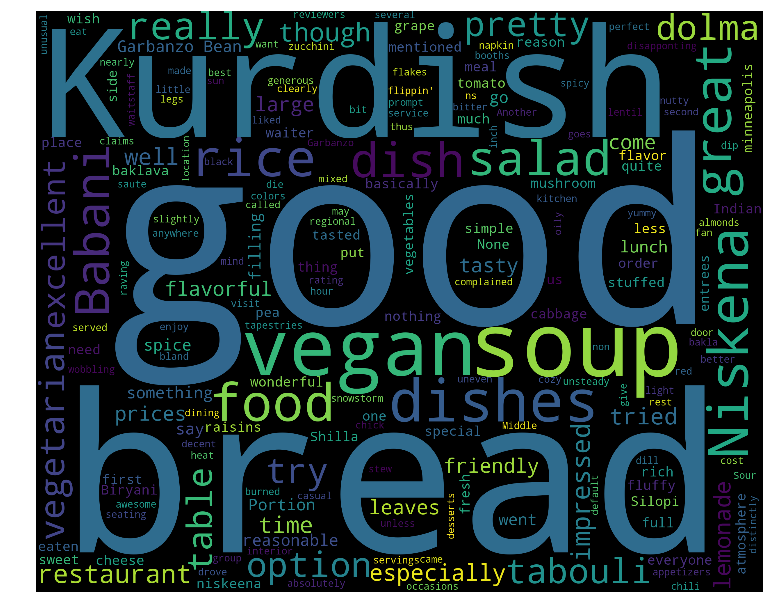

In [19]:
#visualize what everyone is saying
wordcloud_draw(data2['comment'])

## Sentiment Analysis

Let us perform [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) on the text. What is the relationship between the ratings and the sentiments derived.? 

In [21]:
# import library to assist with sentiment analysis
# Currently using https://github.com/cjhutto/vaderSentiment
# NB. There are implications and factors to consider, we will discuss
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
# create a SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### How to use this implementation?

In [23]:
# let us extract ONE (1) senetence
test_sentence = data2['comment'][0]
# analyze that sentence
sentiment_result = analyzer.polarity_scores(test_sentence)
# it returns a python dictionary of values
sentiment_result

{'compound': -0.5157, 'neg': 0.105, 'neu': 0.841, 'pos': 0.054}

In [24]:
# we could analyze each row in our data set using the apply method
data2['comment'].apply(analyzer.polarity_scores)

0     {'pos': 0.054, 'compound': -0.5157, 'neu': 0.8...
1     {'pos': 0.238, 'compound': 0.9847, 'neu': 0.76...
2     {'pos': 0.154, 'compound': 0.4848, 'neu': 0.71...
3     {'pos': 0.111, 'compound': 0.968, 'neu': 0.878...
4     {'pos': 0.116, 'compound': 0.7087, 'neu': 0.84...
5     {'pos': 0.156, 'compound': 0.7402, 'neu': 0.84...
6     {'pos': 0.208, 'compound': 0.9686, 'neu': 0.79...
7     {'pos': 0.19, 'compound': 0.8918, 'neu': 0.787...
8     {'pos': 0.342, 'compound': 0.9796, 'neu': 0.64...
9     {'pos': 0.174, 'compound': 0.9106, 'neu': 0.82...
10    {'pos': 0.27, 'compound': 0.8588, 'neu': 0.73,...
11    {'pos': 0.159, 'compound': 0.799, 'neu': 0.785...
12    {'pos': 0.121, 'compound': 0.1702, 'neu': 0.79...
13    {'pos': 0.224, 'compound': 0.95, 'neu': 0.721,...
14    {'pos': 0.256, 'compound': 0.4767, 'neu': 0.57...
15    {'pos': 0.252, 'compound': 0.5719, 'neu': 0.74...
16    {'pos': 0.0, 'compound': 0.0, 'neu': 0.0, 'neg...
17    {'pos': 0.0, 'compound': 0.0, 'neu': 0.0, 

In [25]:
# let us define a function to analyze one sentence and return the compound value
def get_how_positive(sentence):
    return analyzer.polarity_scores(sentence)['compound']

In [26]:
# testing the application of the method
data2['comment'].apply(get_how_positive)

0    -0.5157
1     0.9847
2     0.4848
3     0.9680
4     0.7087
5     0.7402
6     0.9686
7     0.8918
8     0.9796
9     0.9106
10    0.8588
11    0.7990
12    0.1702
13    0.9500
14    0.4767
15    0.5719
16    0.0000
17    0.0000
18    0.0000
19    0.0000
20    0.0000
21    0.0000
22    0.0000
23    0.0000
24    0.0000
25    0.0000
26    0.0000
27    0.0000
Name: comment, dtype: float64

In [27]:
# creating a new column in our data set to store the sentiment value
data2['sentiment'] = data2['comment'].apply(get_how_positive)
# previewing updates
data2.head(10)

,comment,date,rating,user_name,user_veg_level_desc,user_veg_level_num,sentiment
0,I got the dolmas and tabouli salad which were ...,2010-09-07T19:28:18Z,2,Emme,vegan,4,-0.5157
1,This Kurdish restaurant has great atmosphere a...,2009-08-27T23:26:55Z,4,qster,not telling,0,0.9847
2,You MUST order the Niskena. It may not sound g...,2009-07-27T04:19:21Z,4,Capelli,not telling,0,0.4848
3,"Babani's is a quaint, friendly place with simp...",2009-07-23T07:03:32Z,3,conde.kedar,vegan,4,0.9680
4,This restaurant is great! The tiny seating ar...,2007-03-20T03:50:08Z,5,snowbunny87,not telling,0,0.7087
5,"I've eaten here several times, and I've been i...",2007-02-23T17:21:46Z,4,Unny Nambudiripad,vegan,4,0.7402
6,I really enjoyed my visit to Babani's. \n\nI t...,2006-04-20T01:42:01Z,4,hungry_coconut,vegan,4,0.9686
7,I wish I had more good things to say about thi...,2005-10-26T01:18:13Z,2,Ellen Weinstock,not telling,0,0.8918
8,"Yes, the vegan soup and the bread are excellen...",2005-04-18T04:04:17Z,3,Ramona,vegan,4,0.9796
9,The soup everyone is raving about it really go...,2004-11-06T18:10:24Z,3,v.e.g.a.n.,not telling,0,0.9106


In [28]:
# Deterimining the correlation between the sentiment values and existing ratings
print("Correlation")
data2[['rating','sentiment']].corr()

Correlation


,rating,sentiment
rating,1.000000,0.091718
sentiment,0.091718,1.000000


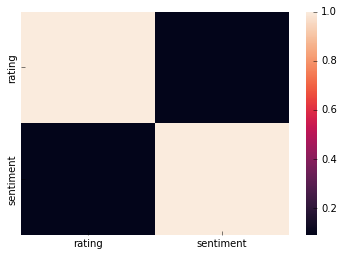

In [29]:
# Visualizing the correlation on a heatmap
sns.heatmap(data2[['rating','sentiment']].corr())

## Questions?